In [111]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [112]:
train=pd.read_csv('train.csv')

In [113]:
ma={"male":0,"female":0}
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
train['Sex']=train['Sex'].map(ma)

In [115]:
train=train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked',]]

In [116]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [117]:
train['Age'].fillna(train.groupby("Sex")['Age'].transform('median'))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      28.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     28.0
18     31.0
19     28.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     28.0
27     19.0
28     28.0
29     28.0
       ... 
861    21.0
862    48.0
863    28.0
864    24.0
865    42.0
866    27.0
867    31.0
868    28.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    28.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [118]:
train.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [119]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [120]:
for i in train:
    train['Cabin']=train['Cabin'].str[:1]

    
    

In [121]:
train.Cabin.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [122]:
train.Cabin.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [123]:
import math
train.Embarked.fillna(inplace=True,value="S")
                

In [124]:

train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [125]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Sex")["Age"].transform("median"), inplace=True)


In [126]:

train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [127]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}

train['Cabin'] = train['Cabin'].map(cabin_mapping)

In [128]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [129]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [130]:
maps={"S":0,"C":1,"Q":2}
train['Embarked']=train['Embarked'].map(maps)

[0.65674753149472243, 0.65561060038588137, 0.66687237543979105, 0.68146748382703437, 0.67145528316876635, 0.67586142322097376, 0.68376489615253655, 0.67033112019067076, 0.66800788786743837, 0.67476251276813071, 0.68491317671092955, 0.67925661105436386, 0.6894072749971627, 0.68488735671319934, 0.69051810237203493, 0.69050533424128935, 0.69614884803087063, 0.69277749404153899, 0.69049228237430493, 0.69506213823629548, 0.68940614005220735, 0.69953155146975365, 0.69953155146975365, 0.70288985359210077, 0.6916533310634434, 0.69386278515492017, 0.69611054363863356, 0.70283991601407325, 0.69840767222789701, 0.70511235955056173, 0.6972086028827601, 0.696109976166156, 0.69160282601293843, 0.69613522869140843, 0.696109976166156, 0.69614771308591528, 0.69164027919645898, 0.6927389059130632, 0.69049143116558853]


Text(0,0.5,'Cross-Validated Accuracy')

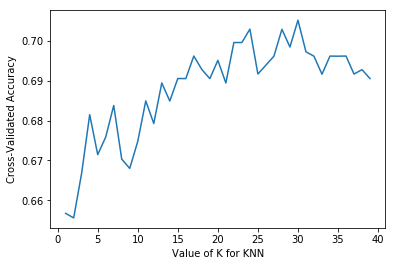

In [131]:
X=train.drop(['Survived'],axis=1)
y=train['Survived']
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
k_range = list(range(1,40))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

So K=30

In [132]:
knn = KNeighborsClassifier(n_neighbors=30)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.705112359551


In [133]:
len(train)

891

In [134]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.70956928839


In [135]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']


os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
import xgboost as xgb

In [136]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score without cross validation: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
        print("Average Accuracy with cross validation: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))
        return clf.predict(X_test)
        

In [137]:
from sklearn.cross_validation import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
from sklearn.model_selection import cross_val_score, cross_val_predict


In [138]:
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

In [139]:
clf=svm.SVR()

In [140]:
clf.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [141]:
accuracy=clf.score(X_test,y_test)

In [142]:
accuracy

-0.033118973544225438

In [110]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
505,1,0,18.0,1,0,108.9000,0.8,1
728,2,0,25.0,1,0,26.0000,1.8,0
661,3,0,40.0,0,0,7.2250,2.0,1
528,3,0,39.0,0,0,7.9250,2.0,0
110,1,0,47.0,0,0,52.0000,0.8,0
274,3,0,28.0,0,0,7.7500,2.0,2
722,2,0,34.0,0,0,13.0000,1.8,0
215,1,0,31.0,1,0,113.2750,1.2,1
349,3,0,42.0,0,0,8.6625,2.0,0
641,1,0,24.0,0,0,69.3000,0.4,1
